<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">CNN</p>
</div>

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass
from tensorflow.keras.optimizers import RMSprop


2024-06-25 17:02:04.286273: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---



## random 



A library used to generate random numbers and perform random operations such as selecting random elements from a list or shuffling elements in a list.


---

## numpy (np)
A powerful library for advanced mathematical and numerical operations, allowing for the handling of multi-dimensional arrays and providing many mathematical functions for scientific and engineering computations.

---

## matplotlib.pyplot (plt)

Purpose: A plotting library that allows you to create a wide range of static, animated, and interactive visualizations such as line plots, scatter plots, and histograms.

---

## tensorflow (tf)

An open-source platform for machine learning, used to build and train deep learning models and neural networks, supporting a variety of machine learning tasks.

---

## tensorflow.keras

A high-level API built on TensorFlow that simplifies the process of building and training deep learning models through an easy-to-use interface.

---

## tensorflow.keras.datasets.cifar10

A dataset used for training and testing image classification models, consisting of 60,000 color images divided into 10 different classes.

---

## tensorflow.keras.utils.to_categorical

A function used to convert class vectors (integers) to binary class matrices (one-hot encoding), facilitating the handling of classifications in deep learning models.

---





## matplotlib.ticker (MultipleLocator, FormatStrFormatter)

Modules from the matplotlib library that allow you to customize the appearance of ticks on plot axes, such as setting tick intervals and formatting tick labels.

---

## dataclasses

A library that provides a decorator and functions for creating data classes with automatic method generation (like init and repr), making it easier to handle structured data with minimal boilerplate code.

---

<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">  Load cifar10 dataset

</p>
</div>

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 
print(X_train.shape)
print(X_test.shape)
# تحويل البيانات المستهدفة إلى تنسيق الفئات
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 10)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 10)


---


<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">  display  dataset

</p>
</div>

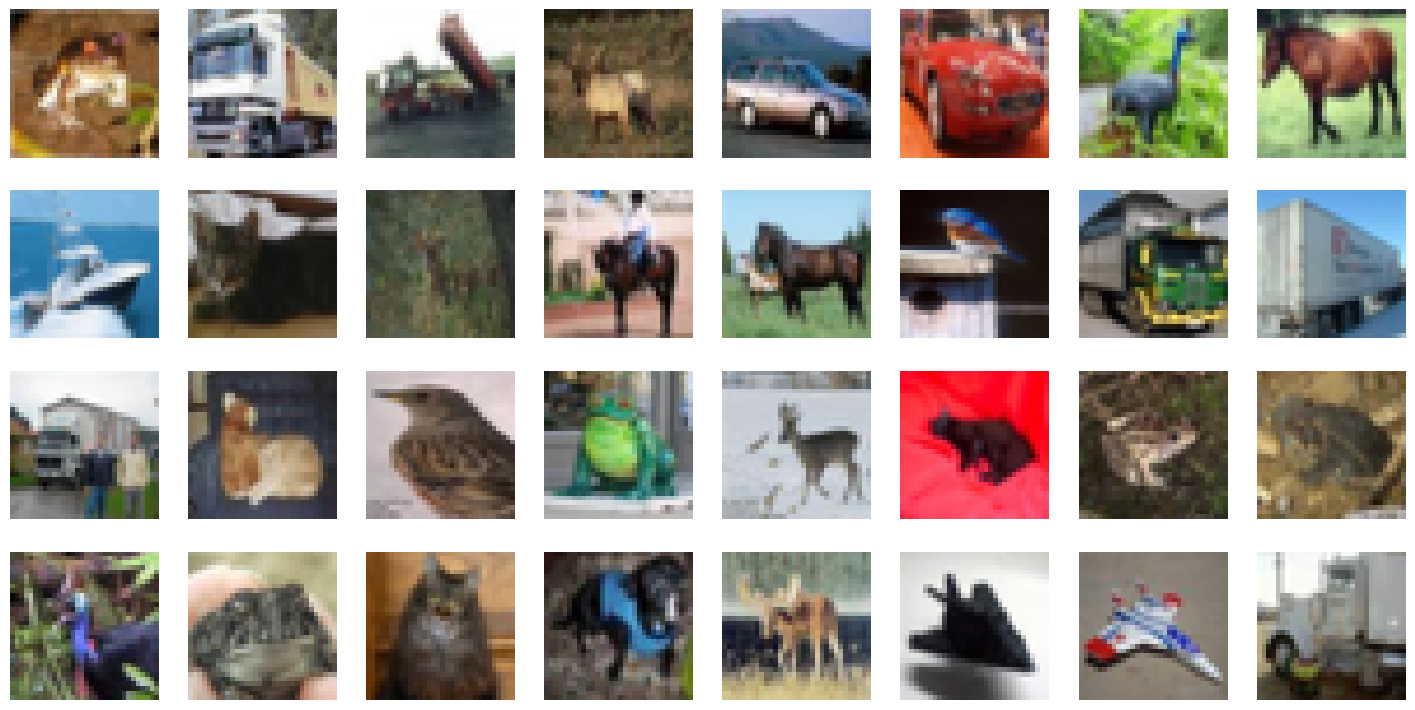

In [4]:
plt.figure(figsize=(18, 9))
 
num_rows = 4
num_cols = 8
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")
    

---


<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">  Dataset Preprocessing
</p>
</div>

<div style='border-radius:10px;background-color:#ffffff;border-style:solid;border-color:#013a2c;letter-spacing:0.5px;'>
<center><h4 style='padding:5px 0px;color:#013a2c;font-weight:bold;font-family:Cursive'>
   Normalize images to the range [0, 1].
</h4></center></div>

In [5]:
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255
print('Original (integer) label for the first training sample: ', y_train[0])
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
After conversion to categorical one-hot encoded labels:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


#### We divide the pixel values by 255 because it is the maximum value for color intensity in images. We do this to scale down the data range, improving training stability, enhancing learning speed, and ensuring input requirements match neural network expectations.

---

<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">  Dataset and Training Configuration Parameters
</p>
</div>



In [6]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3
     
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

        NUM_CLASSES: Specifies the number of classes in the dataset (default is 10 for CIFAR-10).
        IMG_HEIGHT: Specifies the height of the input images (default is 32 pixels).
        IMG_WIDTH: Specifies the width of the input images (default is 32 pixels).
        NUM_CHANNELS: Specifies the number of color channels in the images (default is 3 for RGB images).
        EPOCHS: Specifies the number of training epochs (default is 31).
        BATCH_SIZE: Specifies the batch size used during training (default is 256).
        LEARNING_RATE: Specifies the learning rate for the optimizer (default is 0.001).


---

<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">  Model CNN
</p>
</div>



In [9]:

def cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model
model = cnn_model()
model.compile(optimizer=RMSprop(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()
history = model.fit(X_train, 
                    y_train, 
                    batch_size=256, 
                    epochs=31, 
                    verbose=1, 
                    validation_split=0.3)



X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 546ms/step - accuracy: 0.1737 - loss: 2.2356 - val_accuracy: 0.3360 - val_loss: 1.8940
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 557ms/step - accuracy: 0.3511 - loss: 1.8128 - val_accuracy: 0.3973 - val_loss: 1.6498
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 556ms/step - accuracy: 0.4444 - loss: 1.5570 - val_accuracy: 0.4084 - val_loss: 1.6936
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 552ms/step - accuracy: 0.5035 - loss: 1.3873 - val_accuracy: 0.5160 - val_loss: 1.3340
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 80s 584ms/step - accuracy: 0.5604 - loss: 1.2301 - val_accuracy: 0.5860 - val_loss: 1.1685
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 572ms/step - accuracy: 0.6126 - loss: 1.1059 - val_accuracy: 0.5457 - val_loss: 1.2892
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 72s 528ms/step - accuracy: 0.6498 - loss: 0.9989 - val_accuracy: 0.6243 - val_loss: 1.0666
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 69s 505ms/step - accuracy: 0.6914 - loss: 0

---


<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">  Classifier CNN
</p>
</div>



Before we define the fully connected layers for the classifier, we need to first flatten the two-dimensional activation maps that are produced by the last convolutional layer (which have a spatial shape of 4×4 with 64 channels). This is accomplished by calling the flatten() function to create a 1-dimensional vector of length 1024. We then add a densely connected layer with 512 neurons and a fully connected output layer with ten neurons because we have ten classes in our dataset. And to avoid any confusion, we’ve also provided a detailed diagram of the fully connected layers.

---



<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">  plot results model with Dense 
</p>
</div>

<div style='border-radius:10px;background-color:#ffffff;border-style:solid;border-color:#013a2c;letter-spacing:0.5px;'>
<center><h4 style='padding:5px 0px;color:#013a2c;font-weight:bold;font-family:Cursive'>
  dense neural network is a machine learning model in which each layer is deeply connected to the previous laye dense neural network is a machine learning model in which each layer is deeply connected to the previous laye
</h4></center></div>

In [10]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

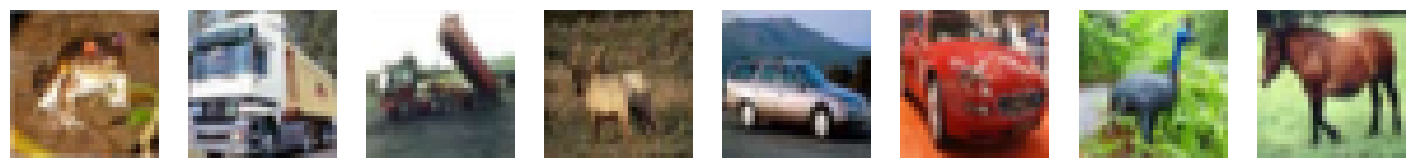

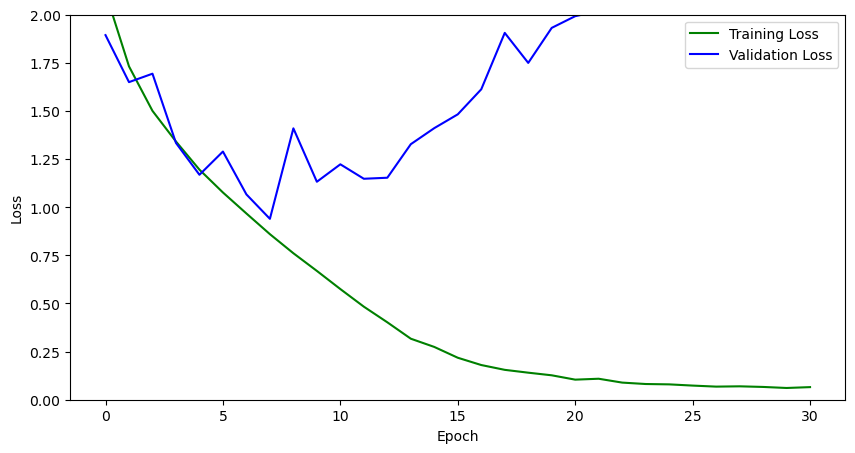

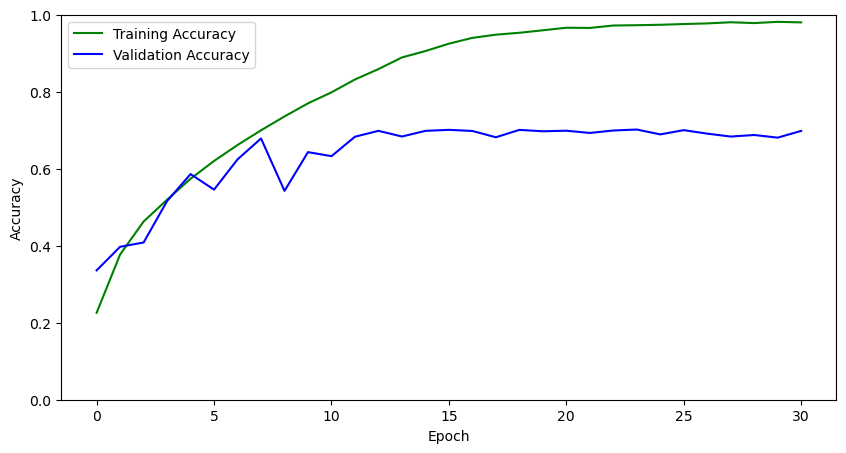

In [11]:
plt.figure(figsize=(18, 9))
num_images = 8
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
def plot_results(metrics, ylabel, ylim, metric_name, color):
    plt.figure(figsize=(10, 5))
    for metric, name, col in zip(metrics, metric_name, color):
        plt.plot(metric, label=name, color=col)
    plt.ylim(ylim)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']
plot_results([train_loss, valid_loss], ylabel="Loss", ylim=[0.0, 2.0],
             metric_name=["Training Loss", "Validation Loss"], color=["g", "b"])

plot_results([train_acc, valid_acc], ylabel="Accuracy", ylim=[0.0, 1.0],
             metric_name=["Training Accuracy", "Validation Accuracy"], color=["g", "b"])

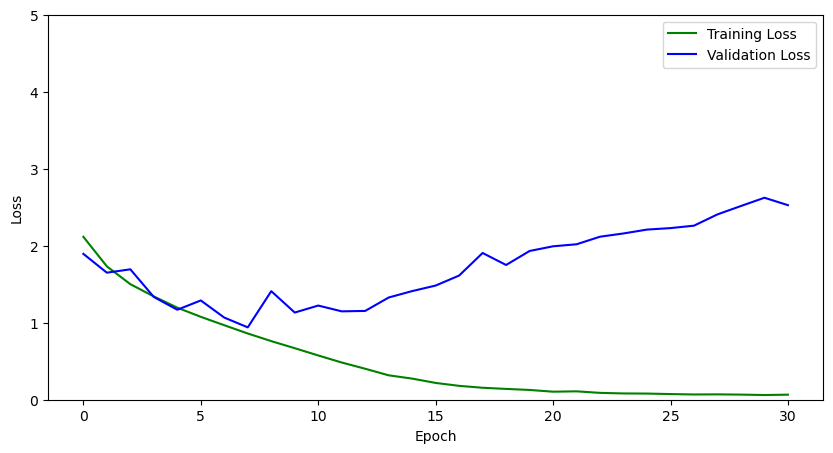

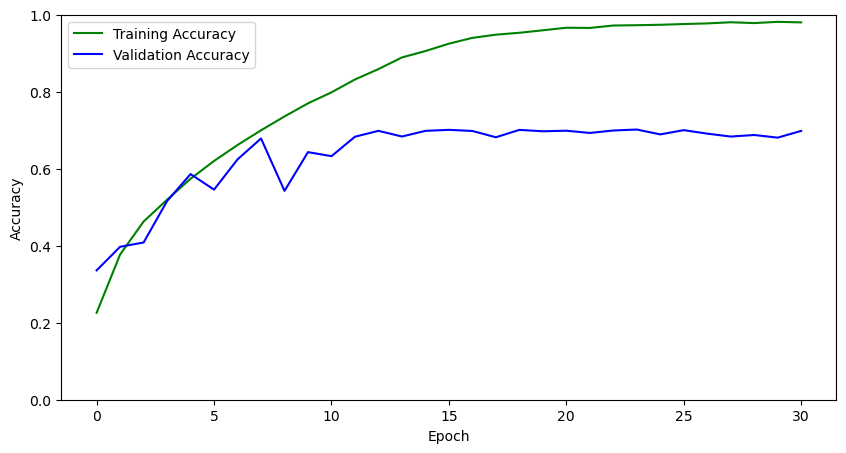

In [12]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
   
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])



<div style='border-radius:10px;background-color:#ffffff;border-style:solid;border-color:#013a2c;letter-spacing:0.5px;'>
<center><h4 style='padding:5px 0px;color:#013a2c;font-weight:bold;font-family:Cursive'>
 reuslt  with Dense  = overfiting 
</h4></center></div>

---



<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">  plot results model with  dropout 
</p>
</div>

<div style='border-radius:10px;background-color:#ffffff;border-style:solid;border-color:#013a2c;letter-spacing:0.5px;'>
<center><h4 style='padding:5px 0px;color:#013a2c;font-weight:bold;font-family:Cursive'>
 Dropout is a technique used in neural networks to improve model performance and reduce overfitting.
</h4></center></div>

In [13]:
def cnn_model_dropout(input_shape=(32, 32, 3)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

In [14]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_dropout.compile(optimizer='rmsprop', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'],
                     )

In [16]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE, 
                            epochs=TrainingConfig.EPOCHS, 
                            verbose=1, 
                            validation_split=.3,
                           )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 591ms/step - accuracy: 0.1430 - loss: 2.2599 - val_accuracy: 0.2768 - val_loss: 1.9658
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 592ms/step - accuracy: 0.3152 - loss: 1.8687 - val_accuracy: 0.3632 - val_loss: 1.7548
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 573ms/step - accuracy: 0.3922 - loss: 1.6505 - val_accuracy: 0.3922 - val_loss: 1.7170
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 567ms/step - accuracy: 0.4542 - loss: 1.5121 - val_accuracy: 0.4875 - val_loss: 1.4435
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 569ms/step - accuracy: 0.4885 - loss: 1.4037 - val_accuracy: 0.4979 - val_loss: 1.4114
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 541ms/step - accuracy: 0.5272 - loss: 1.3181 - val_accuracy: 0.5445 - val_loss: 1.2348
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 73s 534ms/step - accuracy: 0.5635 - loss: 1.2199 - val_accuracy: 0.5935 - val_loss: 1.1360
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 549ms/step - accuracy: 0.6006 - loss: 1

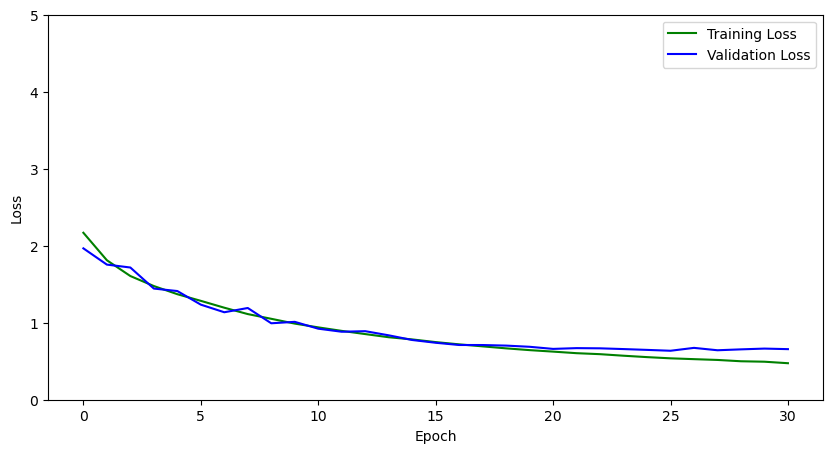

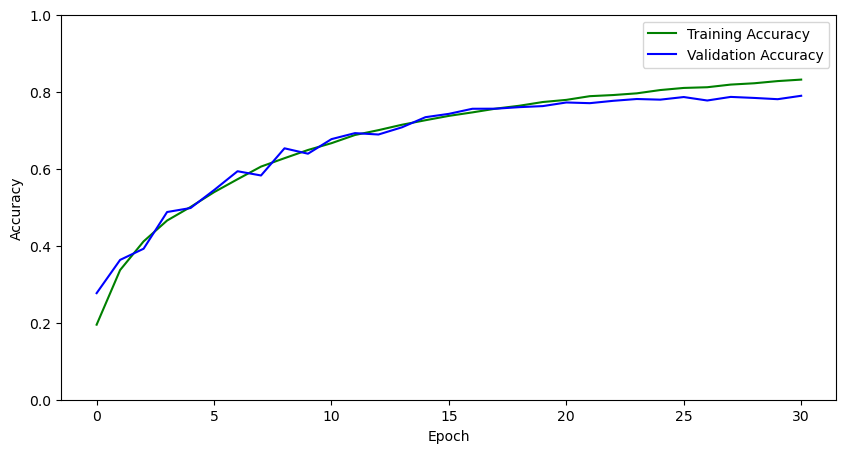

In [17]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
   
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

---



<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">   save model keras 
</p>
</div>

In [18]:
model_dropout.save('model_dropout.keras')

In [19]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout.keras')

---



<div style="padding: 10px; background-color: #FFFFFF; margin: 0; color: #000000; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius: 15px 150px; overflow: hidden; font-weight: 1000; width: 100%; float: left;">
    <p style="margin: 0;">   test model 
</p>
</div>

In [21]:
def evaluate_model(dataset, model):
 
    class_names = ['airplane',
                   'automobile',
                   'bird',
                   'cat',
                   'deer',
                   'dog',
                   'frog',
                   'horse',
                   'ship',
                   'truck' ]
    num_rows = 3
    num_cols = 6
     
    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:num_rows*num_cols]
 
    # Get predictions from model.  
    predictions = model.predict(data_batch)
 
    plt.figure(figsize=(20, 8))
    num_matches = 0
         
    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
             
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
             
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')
                 
        acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)
     
    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Prediction accuracy:  0.94


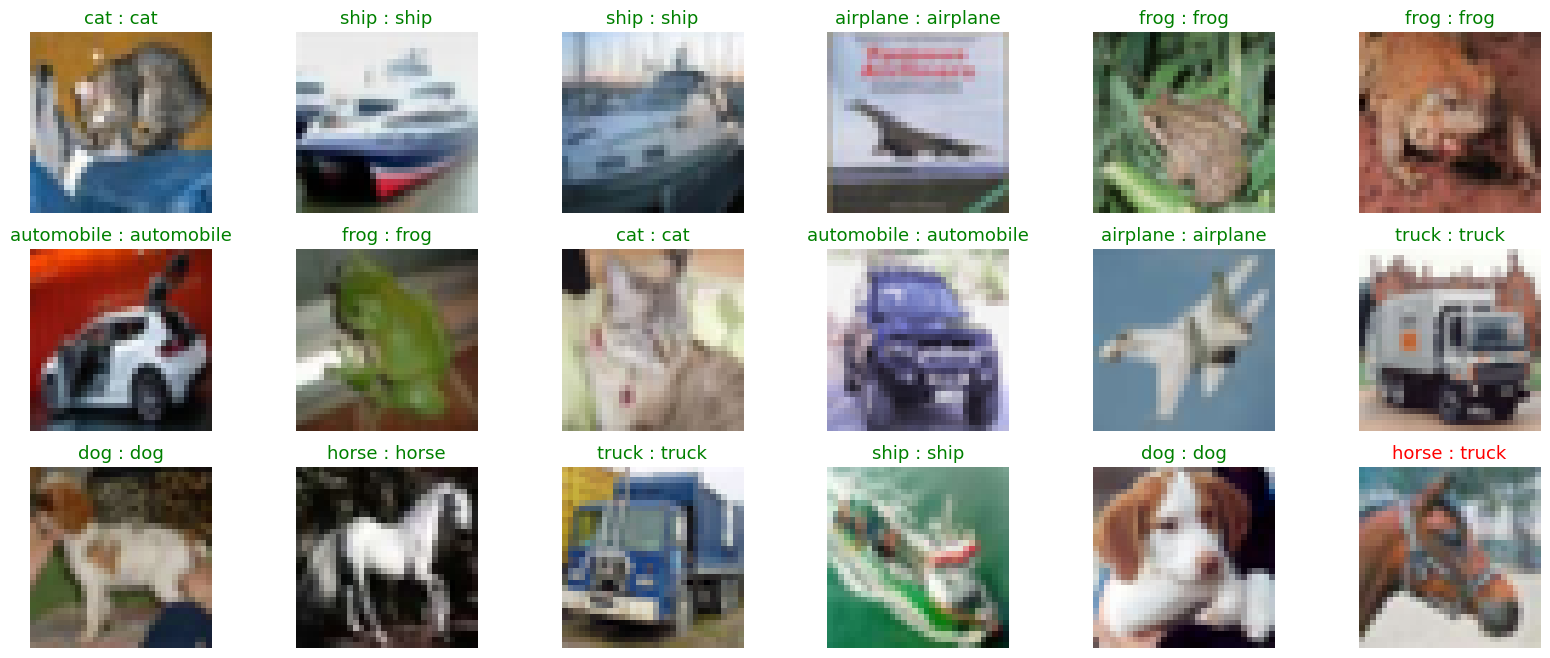

In [22]:
evaluate_model(X_test, reloaded_model_dropout)


---